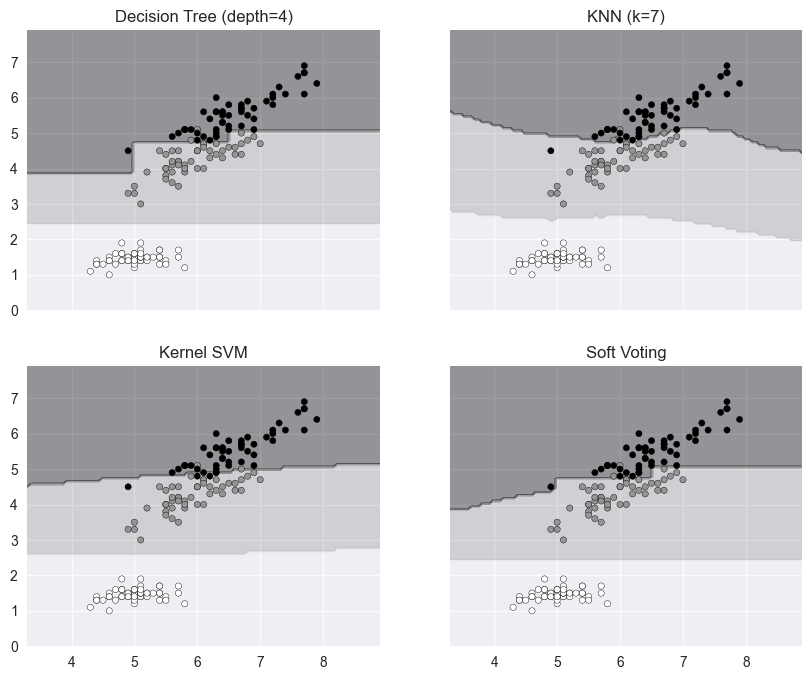

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap6\sourcecode")
# 导入绘图库
import matplotlib.pyplot as plt
# 导入数据集
from sklearn.datasets import load_iris
# 导入决策树分类
from sklearn.tree import DecisionTreeClassifier
# 导入KNN分类
from sklearn.neighbors import KNeighborsClassifier
# 导入SVC
from sklearn.svm import SVC
# 导入投票投票分类器
from sklearn.ensemble import VotingClassifier
# 导入决策边界显示
from sklearn.inspection import DecisionBoundaryDisplay
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 导入product工具
from itertools import product
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 加载数据集
iris = load_iris()
# X， Y
X = iris.data[:, [0, 2]]
y = iris.target
# 决策树
clf1 = DecisionTreeClassifier(max_depth=4)
# KNN
clf2 = KNeighborsClassifier(n_neighbors=7)
# SVC
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
# 投票选择分类器
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft", # 软投票
    weights=[2, 1, 2], # 权重
)
# 模型拟合
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)
# 绘制投票边界
fig, axs = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axs[idx[0], idx[1]], response_method="predict"
    )
    axs[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axs[idx[0], idx[1]].set_title(tt)

plt.show()
fig.savefig("../codeimage/code5.pdf")
